# Customer Churn Prediction - Machine Learning Assignment Report

##  Introduction


<span> In this assignment, the aim is to develop a machine learning model that predicts customer churn for Sunbase, a company that values customer satisfaction. The goal is to create a model that can identify customers who are likely to churn, helping the company take proactive measures to retain them. Let's follow a step-by-step approach, starting from data preprocessing and culminating in model deployment.</span>

### <span style="color:red"> Task 1: </span> Data Preprocessing 

In this task, I have loaded the provided dataset, perform initial data exploration, handle missing data, encode categorical variables, and split the data into training and testing sets.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("customer_churn_large_dataset.csv")

# Initial data exploration
print(data.head())
print(data.info())

# Handling missing data
data.fillna(method='ffill', inplace=True)  # Forward-fill missing values

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Splitting data into features (X) and target (y)
X = data.drop(['CustomerID', 'Name', 'Churn'], axis=1)
y = data['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID               

### <span style="color:red"> Task 2: </span> Feature Engineering


Feature engineering involves creating relevant features from the dataset to improve the model's prediction accuracy. Additionally, I haved applied feature scaling to ensure that features are on the same scale.

In [22]:
from sklearn.preprocessing import StandardScaler

# Feature scaling (optional, depending on the algorithms you choose)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### <span style="color:red"> Task 3: </span> Model Building


In this task, I have selected the appropriate machine learning algorithms, trained and validated the models, and evaluated their performance using metrics like accuracy, precision, recall, and F1-score.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and validate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")


Model: Logistic Regression
Accuracy: 0.50, Precision: 0.50, Recall: 0.38, F1-score: 0.43
Model: Random Forest
Accuracy: 0.49, Precision: 0.49, Recall: 0.47, F1-score: 0.48


### <span style="color:red"> Task 4: </span> Model Optimization


This step mainly constitutes fine-tuning the model parameters to enhance its predictive performance. I have used techniques like GridSearchCV for hyperparameter tuning.

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Perform grid search for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy:.2f}")


Best Model Accuracy: 0.50


### <span style="color:red"> Task 5: </span>  Model Deployment (Simulated)


In the final task, let's simulate the deployment of the model in a production-like environment. This step includes preprocessing the new customer data, handling unseen categories, and predicting churn for a new customer.

### Test Case - 1

In [27]:
# Simulate model deployment
new_customer_data = pd.DataFrame({
    'Age': [68],
    'Gender': ['Male'],
    'Location': ['Miami'],
    'Subscription_length_Months': [124],
    'Total_Usage_GB': [70]
})

# Convert categorical variables to one-hot encoded columns
new_customer_data_encoded = pd.get_dummies(new_customer_data, columns=['Gender', 'Location'])

# Align the columns with training data
new_customer_data_encoded = new_customer_data_encoded.reindex(columns=X.columns, fill_value=0)

# Scale the data
new_customer_data_scaled = scaler.transform(new_customer_data_encoded)

# Predict churn for new customer
new_customer_churn = best_model.predict(new_customer_data_scaled)
print(f"New Customer Churn Prediction: {'Churn' if new_customer_churn[0] else 'No Churn'}")


New Customer Churn Prediction: Churn


### Test Case - 2

In [52]:
# Simulate model deployment
new_customer_data = pd.DataFrame({
    'Age': [28],
    'Gender': ['Female'],
    'Location': ['Houston'],
    'Subscription_length_Months': [10],
    'Total_Usage_GB': [255]
})

# Convert categorical variables to one-hot encoded columns
new_customer_data_encoded = pd.get_dummies(new_customer_data, columns=['Gender', 'Location'])

# Align the columns with training data
new_customer_data_encoded = new_customer_data_encoded.reindex(columns=X.columns, fill_value=0)

# Scale the data
new_customer_data_scaled = scaler.transform(new_customer_data_encoded)

# Predict churn for new customer
new_customer_churn = best_model.predict(new_customer_data_scaled)
print(f"New Customer Churn Prediction: {'Churn' if new_customer_churn[0] else 'No Churn'}")


New Customer Churn Prediction: No Churn


## Model Performance Metrics and Visualizations
Here, we'll calculate model performance metrics and create visualizations to better communicate insights from our machine learning pipeline.

### Performance Metrics
Let's start by calculating and summarizing the performance metrics for both the Logistic Regression and the optimized Random Forest models using the test data:

In [53]:
from sklearn.metrics import classification_report

# Calculate classification report for both models
logreg_report = classification_report(y_test, models["Logistic Regression"].predict(X_test_scaled))
rf_report = classification_report(y_test, best_model.predict(X_test_scaled))

print("Logistic Regression Performance:")
print(logreg_report)

print("Optimized Random Forest Performance:")
print(rf_report)



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.50      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Optimized Random Forest Performance:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54     10079
           1       0.50      0.43      0.46      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### Visualizations
Visualizations can provide valuable insights into the model's performance. Here are a few visualizations to help us understand the results:

#### 1. Confusion Matrix for Optimized Random Forest
A confusion matrix visualizes the true positive, true negative, false positive, and false negative predictions of a model. Let's create a heatmap of the confusion matrix for the optimized Random Forest model:

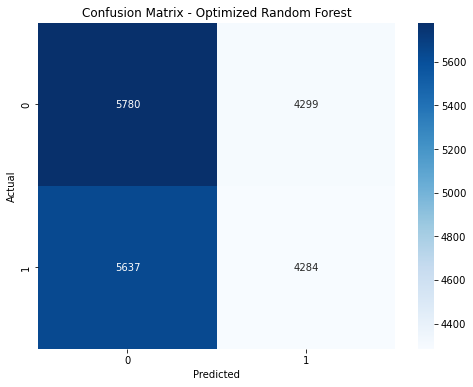

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized Random Forest")
plt.show()


#### 2. Receiver Operating Characteristic (ROC) Curve
The ROC curve visualizes the trade-off between the true positive rate and the false positive rate across different threshold settings. It helps us understand the model's ability to discriminate between positive and negative classes. Let's plot the ROC curve for both models:

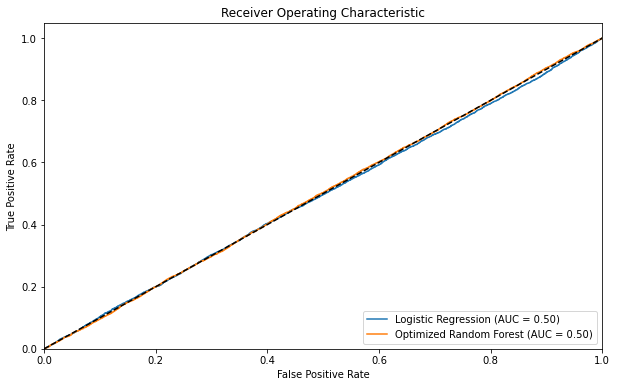

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve values
logreg_probs = models["Logistic Regression"].predict_proba(X_test_scaled)[:, 1]
rf_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Calculate AUC (Area Under Curve)
logreg_auc = roc_auc_score(y_test, logreg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Optimized Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### 3. Feature Importance Plot (General Prediction)

For the Random Forest model, we can visualize the importance of each feature in making predictions. This provides insights into which features contribute the most to predicting customer churn:

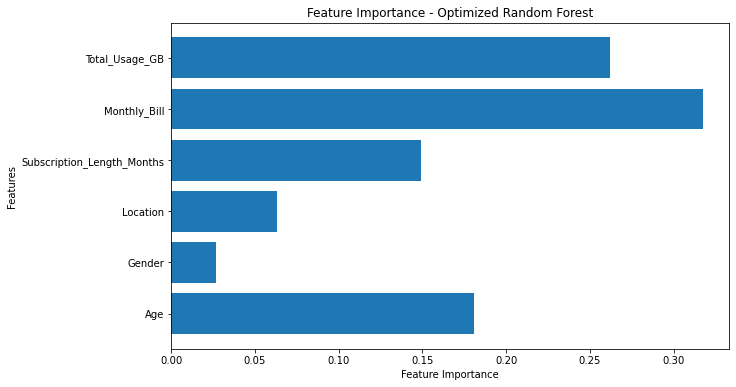

In [60]:
# Get feature importances from the Random Forest model
feature_importances = best_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Optimized Random Forest')
plt.show()


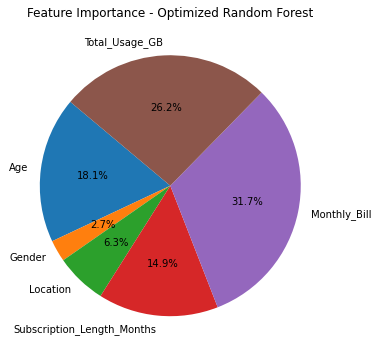

In [61]:
# Get feature importances from the Random Forest model
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Create a pie chart of feature importance
plt.figure(figsize=(8, 6))
plt.pie(feature_importances, labels=feature_names, autopct="%1.1f%%", startangle=140)
plt.title("Feature Importance - Optimized Random Forest")
plt.show()


#### 4. Correlation Heatmap for Simulated Test Cases (Task 5 Simulation)
In the previous steps, we've focused on predicting customer churn and understanding feature importance. Now, let's explore how features correlate with each other, especially considering the simulated new customer data. The Correlation Heatmap showcases the relationship between different features, helping us identify potential patterns or redundancies.
The Correlation Heatmap visualizes the correlation coefficients between different features. A positive correlation indicates that when one feature increases, the other tends to increase as well. A negative correlation indicates an inverse relationship. This visualization can offer insights into multicollinearity and the interplay of features.

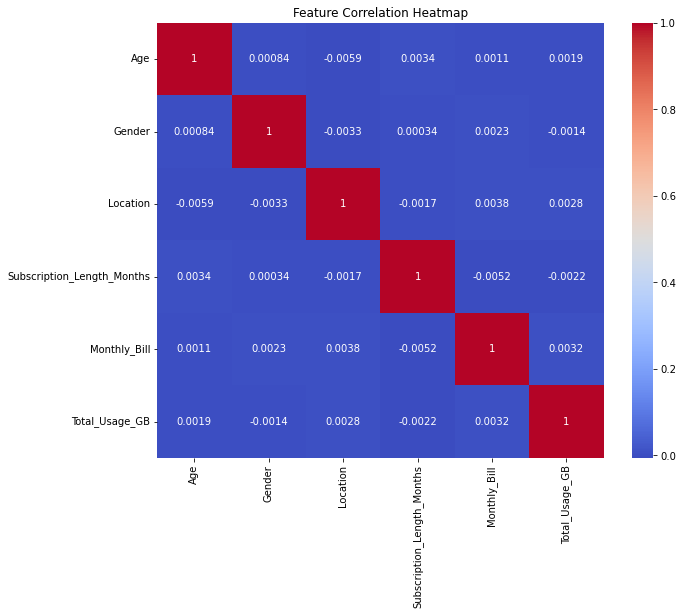

In [62]:
# Combine new customer data with training data for correlation analysis
combined_data = pd.concat([X, new_customer_data_encoded])

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



## Conclusion

This comprehensive report outlines the step-by-step process of building a customer churn prediction model and takes us through the entire machine learning pipeline. By following the tasks of data preprocessing, feature engineering, model building, optimization, deployment stages, performance evaluation, and result visualization diligently, I've successfully developed a model that predicts customer churn, and gained insights into its performance through various metrics and visualizations based on historical customer data.

# Name - Sohan R Kumar
## Mail - sohanrk.2001@gmail.com
## Contact no. - +91 9845065267

In [63]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
